In [1]:
import pandas as pd

In [2]:
from selenium import webdriver

def get_set50():
    driver = webdriver.Chrome(r"D:\SET50\chromedriver.exe")
    driver.get('https://www.set.or.th/th/market/index/set50/overview')
    return driver

driver=get_set50()

C:\Users\ASUSa43s\AppData\Local\Temp\ipykernel_15160\244422094.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"D:\SET50\chromedriver.exe")


In [3]:
def get_set_df(driver):
    data = driver.page_source
    data_df=pd.read_html(data)[2]
    clean_column=[]
    for c in data_df.columns:
        clean_column.append(c.replace('  (Click to sort Ascending)',''))
    data_df.columns=clean_column
    data_df=data_df.set_index('หลักทรัพย์')
    return data_df

data_df=get_set_df(driver)
data_df

,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
หลักทรัพย์,,,,,,,,,,
ADVANC,218.00,218.00,216.00,216.00,-2.00,-0.92,216.00,217.00,1300701,281592.40
AOT,69.75,70.75,69.50,69.50,0.50,0.72,69.50,69.75,33242962,2332823.22
AWC,4.98,5.05,4.98,5.05,0.11,2.23,5.00,5.05,7459025,37342.70
BANPU,12.10,12.30,12.10,12.20,0.10,0.83,12.10,12.20,18859348,229988.06
BBL,130.00,131.00,130.00,131.00,1.50,1.16,130.50,131.00,874343,114085.10
BDMS,25.50,25.75,25.25,25.25,-0.25,-0.98,25.25,25.50,20913274,533439.19
BEM,9.05,9.10,9.05,9.10,0.00,0.00,9.05,9.10,3898159,35365.43
BGRIM,34.00,34.50,33.75,34.50,1.00,2.99,34.25,34.50,5072496,173438.22
BH,171.00,172.00,170.50,171.50,0.00,0.00,171.00,171.50,548960,94109.14


In [4]:
def get_stock_data(stock,driver,all_stock_dict):
    stock=stock.split()[0]
    url='https://www.set.or.th/th/market/product/stock/quote/'+stock+'/financial-statement/company-highlights'
    driver.get(url)
    stock_data=driver.page_source
    a_df=pd.read_html(stock_data)[0]
    b_df=pd.read_html(stock_data)[1]
    all_stock_dict[stock]=[a_df,b_df]
    return driver,all_stock_dict

all_stock_dict=dict()
for stock in data_df.index:
    driver,all_stock_dict=get_stock_data(stock,driver,all_stock_dict)

In [5]:
all_stock_dict['AOT'][0]

,งวดงบการเงิน ณ วันที่,งบปี 2561 30 ก.ย. 2561,งบปี 2562 30 ก.ย. 2562,งบปี 2563 30 ก.ย. 2563,งบปี 2564 30 ก.ย. 2564,งบ 6 เดือน/2565 31 มี.ค. 2565
0,บัญชีทางการเงินที่สำคัญ,NaN,NaN,NaN,NaN,NaN
1,สินทรัพย์รวม,187708.55,198381.56,173558.57,195085.77,182510.26
2,หนี้สินรวม,43439.43,43842.92,30526.90,81664.39,76608.55
3,ส่วนของผู้ถือหุ้น,143902.78,153899.11,142235.58,112343.77,104720.08
4,มูลค่าหุ้นที่เรียกชำระแล้ว,14285.70,14285.70,14285.70,14285.70,14285.70
5,รายได้รวม,61918.81,64384.75,33129.95,7715.73,5666.09
6,กำไร (ขาดทุน) จากกิจกรรมอื่น,217.12,182.04,145.56,-51.08,159.28
7,กำไรสุทธิ,25170.76,25026.37,4320.68,-16322.01,-7548.12
8,กำไรต่อหุ้น (บาท),1.76,1.75,0.30,-1.14,-0.53
9,อัตราส่วนทางการเงินที่สำคัญ,NaN,NaN,NaN,NaN,NaN


In [6]:
for key in all_stock_dict.keys():
    stock_df=all_stock_dict[key]
    stock_df[0].set_index('งวดงบการเงิน ณ วันที่',inplace=True)
    stock_df[1].set_index('ค่าสถิติสำคัญ ณ วันที่',inplace=True)

In [7]:
result_dict = dict()

def update_select_data(key, n_df, select_column, select_row, result_dict):
    try:
        select_data = all_stock_dict[key][n_df][select_column][select_row]
        result_dict[key] = float(select_data)
    except KeyError:
        pass
    except ValueError:
        pass
    return result_dict

n_df=1
select_column='27 พ.ค. 2565'
select_row='ราคาล่าสุด (บาท)'

for key in all_stock_dict.keys():
    result_dict=update_select_data(key,n_df,select_column,select_row,result_dict)

result_dict

{'ADVANC': 218.0,
 'AOT': 69.0,
 'AWC': 4.94,
 'BANPU': 12.1,
 'BBL': 129.5,
 'BDMS': 25.5,
 'BEM': 9.1,
 'BGRIM': 33.5,
 'BH': 171.5,
 'BTS': 8.75,
 'CBG': 108.5,
 'COM7': 37.5,
 'CPALL': 65.0,
 'CPF': 26.0,
 'CPN': 60.75,
 'CRC': 37.0,
 'DTAC': 42.75,
 'EA': 88.75,
 'EGCO': 179.0,
 'GLOBAL': 20.7}

In [8]:
def generate_df(result_dict,select_row):
    result_df=pd.DataFrame([result_dict])
    result_df=result_df.transpose()
    result_df.columns=[select_row]
    result_df=result_df.sort_values(by=select_row,ascending=False)
    return result_df

In [9]:
def generate_df(result_dict,select_row):
    result_df=pd.DataFrame([result_dict])
    result_df=result_df.transpose()
    result_df.columns=[select_row]
    
    return result_df

In [10]:
price_pf=generate_df(result_dict,select_row)
price_pf

,ราคาล่าสุด (บาท)
ADVANC,218.00
AOT,69.00
AWC,4.94
BANPU,12.10
BBL,129.50
BDMS,25.50
BEM,9.10
BGRIM,33.50
BH,171.50
BTS,8.75


In [11]:
pe_df=generate_df(result_dict,select_row)
pe_df

,ราคาล่าสุด (บาท)
ADVANC,218.00
AOT,69.00
AWC,4.94
BANPU,12.10
BBL,129.50
BDMS,25.50
BEM,9.10
BGRIM,33.50
BH,171.50
BTS,8.75


<AxesSubplot:title={'center':'SET50 P/E by Stock'}>

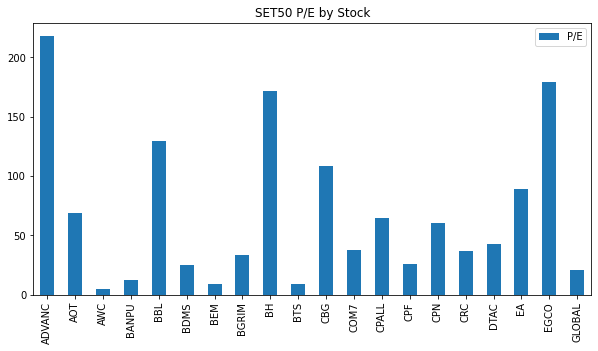

In [12]:
pe_df.columns=['P/E']
pe_df.plot(kind='bar',figsize=(10,5),title='SET50 P/E by Stock')


In [13]:
focus_df=pe_df[(pe_df['P/E']>=15) & (pe_df['P/E']<=25)]
focus_df


,P/E
GLOBAL,20.7


<AxesSubplot:>

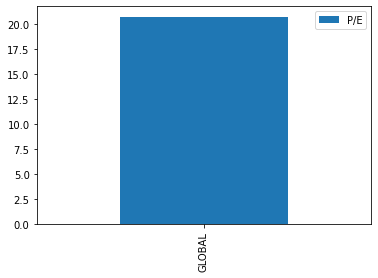

In [14]:
focus_df.plot(kind='bar')

In [15]:
n_df=1
select_column='30 ธ.ค. 2564'
select_row='P/BV (เท่า)'

result_dict=dict()

for key in all_stock_dict.keys():
    result_dict=update_select_data(key,n_df,select_column,select_row,result_dict)

pbv_df=generate_df(result_dict,select_row)
pbv_df

,P/BV (เท่า)
ADVANC,9.15
AOT,7.76
AWC,1.90
BANPU,1.04
BBL,0.48
BDMS,4.53
BEM,3.41
BGRIM,3.59
BH,6.75
BTS,2.06


In [16]:
pbv_df.loc['BH']

P/BV (เท่า)    6.75
Name: BH, dtype: float64

In [17]:
pe_df['P/BV (เท่า)']=pbv_df
pe_df

,P/E,P/BV (เท่า)
ADVANC,218.00,9.15
AOT,69.00,7.76
AWC,4.94,1.90
BANPU,12.10,1.04
BBL,129.50,0.48
BDMS,25.50,4.53
BEM,9.10,3.41
BGRIM,33.50,3.59
BH,171.50,6.75
BTS,8.75,2.06


<AxesSubplot:>

c:\Users\ASUSa43s\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUSa43s\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUSa43s\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUSa43s\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


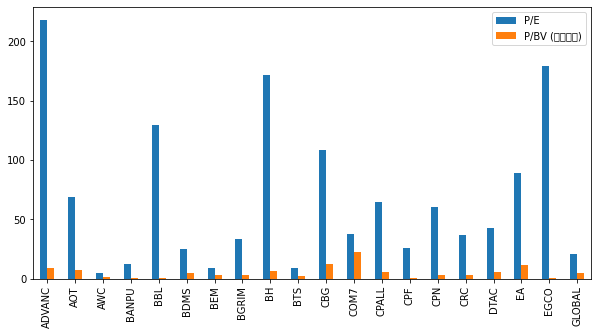

In [18]:
pe_df.plot(kind='bar',figsize=(10,5))